In [1]:
import matplotlib.pyplot as plt;
import numpy as np
import scipy.optimize as opt
plt.rcParams['figure.figsize'] = [15, 10]

In [19]:
rawData = np.genfromtxt('testdata_9600.csv',dtype='float',delimiter=',',unpack=True)
print(rawData)

[[   0.          4.273536    4.27406  ...  609.009132  609.024732
   609.040332]
 [   7.       -158.       -157.       ...  -78.        -79.
   -81.      ]]


In [21]:
print(rawData[0])

[  0.         4.273536   4.27406  ... 609.009132 609.024732 609.040332]


In [22]:
time = rawData[0]
angle = rawData[1]
yUnc = np.full((angle.size),0.5)

(-400.0, 0.0)

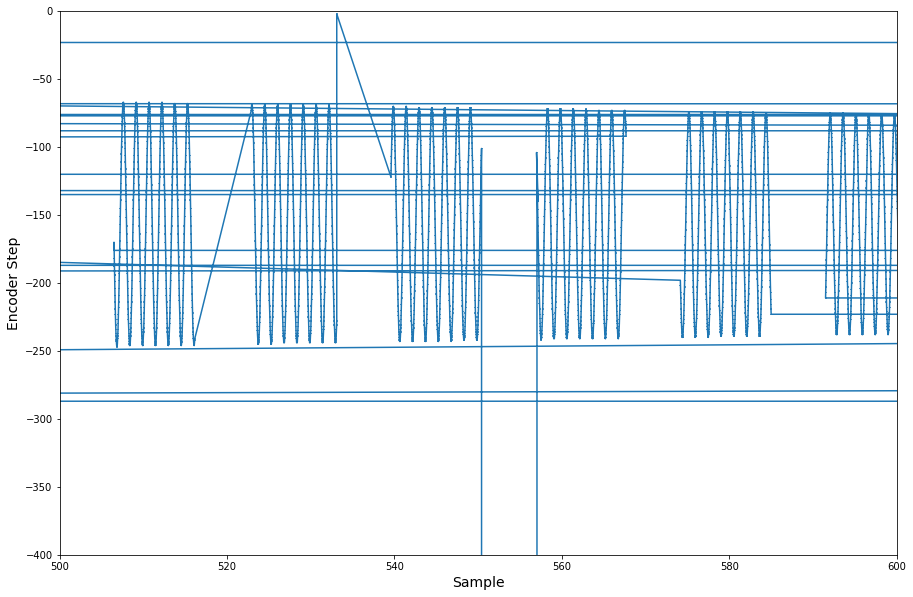

In [38]:
plt.errorbar(time,angle,yerr=yUnc)
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Encoder Step',fontsize=14)
plt.xlim(500,600)
plt.ylim(-400,0)

In [24]:
def pendulumModel(x, *par):
    return par[0]*np.exp(-par[1]*x)* np.sin(par[2]*x+par[3])+par[4]

In [31]:
par0 = [1,1,1,1,1]
fitParams,fitCovariance = opt.curve_fit(pendulumModel,time,angle,par0,sigma=yUnc)

<ipython-input-24-631fd68f2d00>:2: RuntimeWarning: overflow encountered in exp
  return par[0]*np.exp(-par[1]*x)* np.sin(par[2]*x+par[3])+par[4]
<ipython-input-24-631fd68f2d00>:2: RuntimeWarning: overflow encountered in multiply
  return par[0]*np.exp(-par[1]*x)* np.sin(par[2]*x+par[3])+par[4]


In [46]:
#fitCheck = pendulumModel(time,fitParams[0],fitParams[1],fitParams[2],fitParams[3],fitParams[4])
fitCheck = pendulumModel(time,*fitParams)

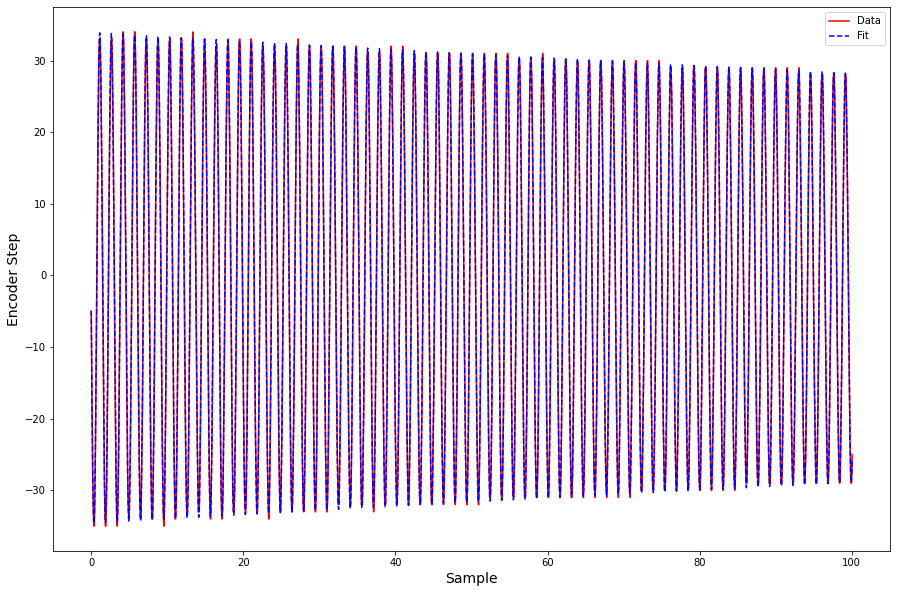

In [47]:
plt.plot(time,angle,'r-',label='Data')
plt.plot(time,fitCheck,'b--',label='Fit')
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Encoder Step',fontsize=14)
plt.legend()

Text(0, 0.5, 'Fit residual')

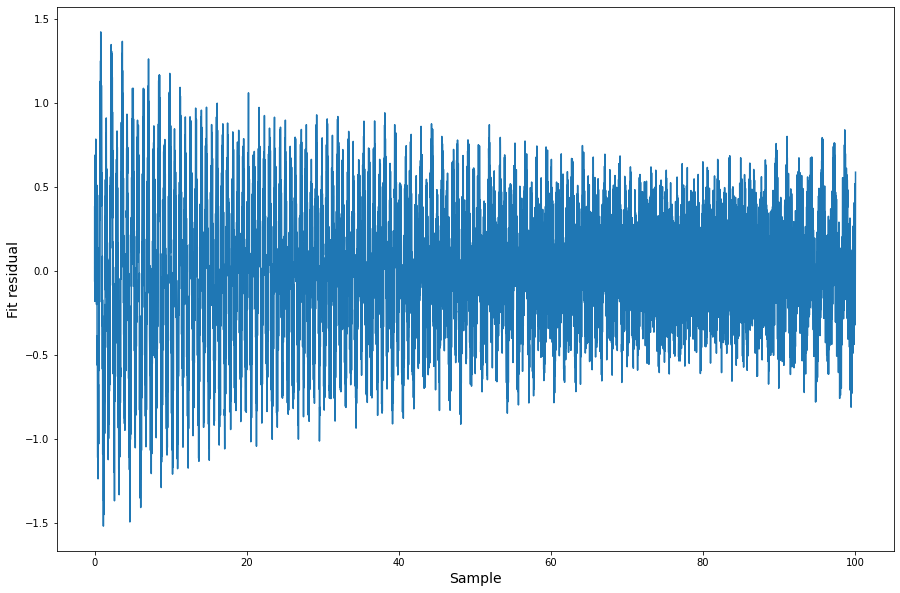

In [48]:
resid = angle-fitCheck
plt.plot(time,resid)
plt.xlabel('Sample',fontsize=14)
plt.ylabel('Fit residual',fontsize=14)

<ipython-input-49-64e36d1bc904>:1: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(time,resid/angle)


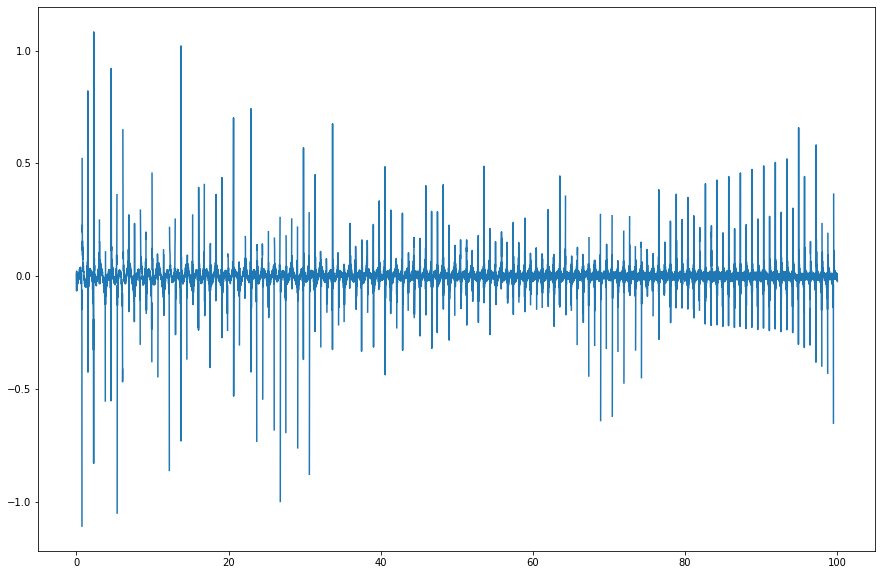

In [49]:
plt.plot(time,resid/angle)

In [50]:
for par in range(fitParams.size):
    print('Parameter',par,':',fitParams[par],'+/-',np.sqrt(fitCovariance[par,par]))

Parameter 0 : -34.28946163347838 +/- 0.014154819005257389
Parameter 1 : 0.0018241947036916608 +/- 7.522519410898684e-06
Parameter 2 : 4.101170491158437 +/- 7.4349664722445675e-06
Parameter 3 : -6.148801056966499 +/- 0.000407391793708089
Parameter 4 : -0.348629098981602 +/- 0.004811818478405866
